## Define Tetris Game

In [1]:
### version 1

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]

In [2]:
### version 2

import numpy as np

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)

In [3]:
### version 3

import numpy as np
import random

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)
    
        self.current_tile = Tetris.UNDEFINED
        self.tile_x = Tetris.UNDEFINED
        self.tile_y = Tetris.UNDEFINED
        self.tile_orientation = Tetris.UNDEFINED
                
        self.next_tile()
        
    def next_tile(self):
        """Get the next tile."""
        
        self.current_tile = random.randint(0, len(Tetris.TILES) - 1)

        self.tile_x = self.cols // 2
        self.tile_y = self.rows
        self.tile_orientation = 0
    
    def move_left(self):
        """Move current tile to the left."""
        
        if self.tile_x - 1 >= 0:
            self.tile_x -= 1
            return True
        else:
            return False
    
    def move_right(self):
        """Move current tile to the right."""

        tile_width = len(Tetris.TILES[self.current_tile][self.tile_orientation])
        if self.tile_x + 1 <= self.cols - tile_width:
            self.tile_x += 1
            return True
        else:
            return False
    
    def rotate(self):
        """Rotate current tile."""

        new_orientation = ((self.tile_orientation + 1) 
                           % len(Tetris.TILES[self.current_tile]))
        tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
        if self.tile_x <= self.cols - tile_width:
            self.tile_orientation = new_orientation
            return True
        else:
            return False
        
    def drop(self):
        """Drop current tile and update game board."""

        tile = Tetris.TILES[self.current_tile][self.tile_orientation]
        
        # Find first location where the piece collides with occupied locations.
        self.tile_y = 0
        for x in range(len(tile)):
            cury = -1
            for y in range(self.rows -1, -1, -1):
                if self.board[y, self.tile_x + x] > 0:
                    # Calculate the y position for this column 
                    # if no other columns are taken into account.
                    cury = y + 1 - tile[x][0]
                    break
            if self.tile_y < cury:
                self.tile_y = cury

            # Change board entries at the newly placed tile to occupied.
            for x in range(len(tile)):
                self.board[self.tile_y + tile[x][0]:self.tile_y + tile[x][1], 
                           x + self.tile_x] = 1

            # Remove full lines.
            removed_lines = 0
            for y in range(self.rows - 1, -1, -1):
                if np.sum(self.board[y, :]) == self.cols:
                    removed_lines += 1
                    for y1 in range(y, self.rows - 1):
                        self.board[y1, :] = self.board[y1 + 1, :]
                    self.board[self.rows - 1, :] = Tetris.UNDEFINED
            
            self.next_tile()

In [4]:
### version 4

import numpy as np
import random

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols, max_tiles, random_seed):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.max_tiles = max_tiles
        self.random_seed = random_seed
        
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)
    
        self.current_tile = Tetris.UNDEFINED
        self.tile_x = Tetris.UNDEFINED
        self.tile_y = Tetris.UNDEFINED
        self.tile_orientation = Tetris.UNDEFINED

        self.gameover = False
        self.tile_count = 0

        # Create predefined tile sequence.
        rand_state = random.getstate()
        random.seed(self.random_seed)
        self.tile_sequence = [random.randint(0, len(Tetris.TILES) - 1) 
                              for x in range(self.max_tiles)]
        random.setstate(rand_state)

        self.next_tile()
        
    def next_tile(self):
        """Get the next tile."""
        
        if self.tile_count < self.max_tiles:
            if self.random_seed is not None:
                self.current_tile = self.tile_sequence[self.tile_count]
            else:
                self.current_tile = random.randint(0, len(Tetris.TILES) - 1)

            self.tile_x = self.cols // 2
            self.tile_y = self.rows
            self.tile_orientation = 0
            
            self.tile_count += 1
        else:
            self.gameover = True
                
    def move_left(self):
        """Move current tile to the left."""
        
        if self.tile_x - 1 >= 0:
            self.tile_x -= 1
            return True
        else:
            return False
    
    def move_right(self):
        """Move current tile to the right."""

        tile_width = len(Tetris.TILES[self.current_tile][self.tile_orientation])
        if self.tile_x + 1 <= self.cols - tile_width:
            self.tile_x += 1
            return True
        else:
            return False
    
    def rotate(self):
        """Rotate current tile."""

        new_orientation = ((self.tile_orientation + 1) 
                           % len(Tetris.TILES[self.current_tile]))
        tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
        if self.tile_x <= self.cols - tile_width:
            self.tile_orientation = new_orientation
            return True
        else:
            return False
        
    def drop(self):
        """Drop current tile and update game board."""

        tile = Tetris.TILES[self.current_tile][self.tile_orientation]
        
        # Find first location where the piece collides with occupied locations.
        self.tile_y = 0
        for x in range(len(tile)):
            cury = -1
            for y in range(self.rows -1, -1, -1):
                if self.board[y, self.tile_x + x] > 0:
                    # Calculate the y position for this column 
                    # if no other columns are taken into account.
                    cury = y + 1 - tile[x][0]
                    break
            if self.tile_y < cury:
                self.tile_y = cury

        if self.tile_y + np.max(tile) > self.rows:
            self.gameover = True
        else:            
            # Change board entries at the newly placed tile to occupied.
            for x in range(len(tile)):
                self.board[self.tile_y + tile[x][0]:self.tile_y + tile[x][1], 
                           x + self.tile_x] = 1

            # Remove full lines.
            removed_lines = 0
            for y in range(self.rows - 1, -1, -1):
                if np.sum(self.board[y, :]) == self.cols:
                    removed_lines += 1
                    for y1 in range(y, self.rows - 1):
                        self.board[y1, :] = self.board[y1 + 1, :]
                    self.board[self.rows - 1, :] = Tetris.UNDEFINED
            
            self.next_tile()

In [1]:
### version 5 - FINAL > for_tetris.py

import numpy as np
import random

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols, max_tiles, random_seed):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.max_tiles = max_tiles
        self.random_seed = random_seed
        
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)
    
        self.current_tile = Tetris.UNDEFINED
        self.tile_x = Tetris.UNDEFINED
        self.tile_y = Tetris.UNDEFINED
        self.tile_orientation = Tetris.UNDEFINED

        self.gameover = False
        self.tile_count = 0
        self.reward = 0

        # Create predefined tile sequence.
        rand_state = random.getstate()
        random.seed(self.random_seed)
        self.tile_sequence = [random.randint(0, len(Tetris.TILES) - 1) 
                              for x in range(self.max_tiles)]
        random.setstate(rand_state)
        
        self.next_tile()
        
    def next_tile(self):
        """Get the next tile."""
        
        if self.tile_count < self.max_tiles:
            if self.random_seed is not None:
                self.current_tile = self.tile_sequence[self.tile_count]
            else:
                self.current_tile = random.randint(0, len(Tetris.TILES) - 1)

            self.tile_x = self.cols // 2
            self.tile_y = self.rows
            self.tile_orientation = 0
            
            self.tile_count += 1
        else:
            self.gameover = True
                
    def move_left(self):
        """Move current tile to the left."""
        
        if self.tile_x - 1 >= 0:
            self.tile_x -= 1
            return True
        else:
            return False
    
    def move_right(self):
        """Move current tile to the right."""

        tile_width = len(Tetris.TILES[self.current_tile][self.tile_orientation])
        if self.tile_x + 1 <= self.cols - tile_width:
            self.tile_x += 1
            return True
        else:
            return False
    
    def rotate(self):
        """Rotate current tile."""

        new_orientation = ((self.tile_orientation + 1) 
                           % len(Tetris.TILES[self.current_tile]))
        tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
        if self.tile_x <= self.cols - tile_width:
            self.tile_orientation = new_orientation
            return True
        else:
            return False
        
    def drop(self):
        """Drop current tile and update game board."""

        tile = Tetris.TILES[self.current_tile][self.tile_orientation]
        
        # Find first location where the piece collides with occupied locations.
        self.tile_y = 0
        for x in range(len(tile)):
            cury = -1
            for y in range(self.rows -1, -1, -1):
                if self.board[y, self.tile_x + x] > 0:
                    # Calculate the y position for this column 
                    # if no other columns are taken into account.
                    cury = y + 1 - tile[x][0]
                    break
            if self.tile_y < cury:
                self.tile_y = cury

        if self.tile_y + np.max(tile) > self.rows:
            self.gameover = True
            dreward = -100
        else:            
            # Change board entries at the newly placed tile to occupied.
            for x in range(len(tile)):
                self.board[self.tile_y + tile[x][0]:self.tile_y + tile[x][1], 
                           x + self.tile_x] = 1

            # Remove full lines.
            removed_lines = 0
            for y in range(self.rows - 1, -1, -1):
                if np.sum(self.board[y, :]) == self.cols:
                    removed_lines += 1
                    for y1 in range(y, self.rows - 1):
                        self.board[y1, :] = self.board[y1 + 1, :]
                    self.board[self.rows - 1, :] = Tetris.UNDEFINED
            dreward = 10 ** (removed_lines - 1) if removed_lines > 0 else 0
            
            self.next_tile()
        
        self.reward += dreward
        
        return dreward

In [6]:
#from for_tetris import Tetris

tetris = Tetris(rows=4, cols=4, max_tiles=50, random_seed=123456)

### Playing Tetris with the Command Line

In [2]:
while not tetris.gameover:
    print(f"Tile {tetris.tile_count}/{tetris.max_tiles}")
    print(f"Reward: {tetris.reward}")
    print(f"Current tile {tetris.current_tile} with "
          f"orientation {tetris.tile_orientation} at position {tetris.tile_x}")
    print(tetris.TILES[tetris.current_tile][tetris.tile_orientation])
    print(tetris.board)
    
    cmd = input("Please enter your command (L, R, O, D, X): ").upper()
    print(f"Your input: {cmd}")

    if cmd == "L":
        tetris.move_left()
    elif cmd == "R":
        tetris.move_right()
    elif cmd == "O":
        tetris.rotate()
    elif cmd == "D":
        tetris.drop()
    elif cmd == "X":
        break


NameError: name 'tetris' is not defined

### Playing Tetris with GUI

In [3]:
### FINAL > for_tetris.py

import pygame

def play_tetris_with_gui(tetris):
    """Play Tetris with GUI for human players."""

    # GUI parameters.
    TILE_SIZE = 20

    BLACK = (0, 0, 0)
    GREY = (128, 128, 128)
    WHITE = (255, 255, 255)
    RED =  (255, 0, 0)

    # Initialize the game engine.
    pygame.init()
    pygame.display.set_caption("TETRIS")
    screen = pygame.display.set_mode((200 + tetris.cols * TILE_SIZE, 
                                    200 + tetris.rows * TILE_SIZE))
    pygame.key.set_repeat(300, 100)  # Set keyboard delay and interval in ms.
    font = pygame.font.SysFont("Calibri", 25, True)

    # Loop until the window is closed.
    running = True
    while running:    
        # Paint game board.
        if pygame.display.get_active():
            screen.fill(WHITE)

            for i in range(tetris.rows):
                for j in range(tetris.cols):
                    pygame.draw.rect(
                        screen, 
                        GREY, 
                        [100 + TILE_SIZE * j, 
                         80 + TILE_SIZE * (tetris.rows - i), 
                         TILE_SIZE, 
                         TILE_SIZE], 
                        1
                    )
                    if tetris.board[i][j] > 0:
                        pygame.draw.rect(
                            screen, 
                            BLACK,
                            [101 + TILE_SIZE * j, 
                             81 + TILE_SIZE * (tetris.rows - i), 
                             TILE_SIZE - 2, 
                             TILE_SIZE - 2],
                        )
            
            tile = tetris.TILES[tetris.current_tile][tetris.tile_orientation]
            for x in range(len(tile)):
                for y in range(tile[x][0], tile[x][1]):
                    pygame.draw.rect(
                        screen,
                        RED,
                        [101 + TILE_SIZE * (x + tetris.tile_x), 
                         81 + TILE_SIZE * (tetris.rows - (y + tetris.tile_y)), 
                         TILE_SIZE - 2,
                         TILE_SIZE - 2]
                    )
            
            screen.blit(
                font.render(f"Reward: {tetris.reward}", True, BLACK), 
                [0, 0]
            )
            screen.blit(
                font.render(f"Tile {tetris.tile_count}/{tetris.max_tiles}", 
                            True, BLACK), 
                [0, 30]
            )
            if tetris.gameover:
                screen.blit(font.render("G A M E   O V E R", True, RED), 
                            [40, 100 + tetris.rows * TILE_SIZE])
                screen.blit(font.render("Press ESC to try again", True, RED), 
                            [10, 100 + tetris.rows * TILE_SIZE + 30])

        pygame.display.flip()
        
        # Get user input.
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    tetris.restart()
                if not tetris.gameover:
                    if event.key == pygame.K_LEFT:
                        tetris.move_left()
                    elif event.key == pygame.K_RIGHT:
                        tetris.move_right()
                    elif event.key == pygame.K_UP:
                        tetris.rotate()
                    elif event.key == pygame.K_DOWN:
                        tetris.drop()    
                
    pygame.quit()


pygame 2.5.2 (SDL 2.28.3, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
#from for_tetris import tetris_gui

tetris.restart()
play_tetris_with_gui(tetris)

## Q-Learning

### Adapt Tetris for Q-learning with teleportation

In [4]:
### FINAL > for_tetris.py
 
class QLTetris(Tetris):
    """Simplified Tetris for Q-learning."""
    
    def __init__(self, rows, cols, max_tiles, random_seed):
        """Initialize Tetris for Q-learning."""
        
        super().__init__(rows, cols, max_tiles, random_seed)
    
    def teleport(self, new_x, new_orientation):
        """Teleport current tile to new position and orientation."""
            
        if 0 <= new_orientation < len(Tetris.TILES[self.current_tile]):
            tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
            if 0 <= new_x <= self.cols - tile_width:
                self.tile_x = new_x
                self.tile_orientation = new_orientation
                return True
        return False


In [11]:
# from for_tetris import QLTetris

qltetris = QLTetris(rows=4, cols=4, max_tiles=50, random_seed=123456)

### QLAgent

In [12]:
### version 1
# Agent that picks a random action and tries the teleportation and drop off.
# Nothing happens if teleportation is to illegal place

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
            else:
                return False  # Finish.
        else:
            # Select action.
            action = np.random.randint(self.action_num)
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                self.tetris.drop()
            
        return True  # Continue.



In [5]:
### FINAL > for_tetris.py

def observe_tetris_with_gui(tetris, agent):
    """Observe with GUI Tetris played by a QL agent."""

    # GUI parameters.
    TILE_SIZE = 20

    BLACK = (0, 0, 0)
    GREY = (128, 128, 128)
    WHITE = (255, 255, 255)
    RED =  (255, 0, 0)

    # Initialize the game engine.
    pygame.init()
    pygame.display.set_caption("TETRIS")
    screen = pygame.display.set_mode((200 + tetris.cols * TILE_SIZE, 
                                    200 + tetris.rows * TILE_SIZE))
    pygame.key.set_repeat(300, 100)  # Set keyboard delay and interval in ms.
    font = pygame.font.SysFont("Calibri", 25, True)

    # Loop until the window is closed.
    running = True
    while running:    
        # Paint game board.
        if pygame.display.get_active():
            screen.fill(WHITE)

            for i in range(tetris.rows):
                for j in range(tetris.cols):
                    pygame.draw.rect(
                        screen, 
                        GREY, 
                        [100 + TILE_SIZE * j, 
                         80 + TILE_SIZE * (tetris.rows - i), 
                         TILE_SIZE, 
                         TILE_SIZE], 
                        1
                    )
                    if tetris.board[i][j] > 0:
                        pygame.draw.rect(
                            screen, 
                            BLACK,
                            [101 + TILE_SIZE * j, 
                             81 + TILE_SIZE * (tetris.rows - i), 
                             TILE_SIZE - 2, 
                             TILE_SIZE - 2],
                        )
            
            tile = tetris.TILES[tetris.current_tile][tetris.tile_orientation]
            for x in range(len(tile)):
                for y in range(tile[x][0], tile[x][1]):
                    pygame.draw.rect(
                        screen,
                        RED,
                        [101 + TILE_SIZE * (x + tetris.tile_x), 
                         81 + TILE_SIZE * (tetris.rows - (y + tetris.tile_y)), 
                         TILE_SIZE - 2,
                         TILE_SIZE - 2]
                    )
            
            screen.blit(
                font.render(f"Reward: {tetris.reward}", True, BLACK), 
                [0, 0]
            )
            screen.blit(
                font.render(f"Tile {tetris.tile_count}/{tetris.max_tiles}", 
                            True, BLACK), 
                [0, 30]
            )
            if tetris.gameover:
                screen.blit(font.render("G A M E   O V E R", True, RED), 
                            [40, 100 + tetris.rows * TILE_SIZE])
                screen.blit(font.render("Press ESC to try again", True, RED), 
                            [10, 100 + tetris.rows * TILE_SIZE + 30])

        pygame.display.flip()
        
        # Get user input.
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                running = agent.next_turn()
                
    pygame.quit()


In [14]:
#from for_tetris import observe_tetris_with_gui

qltetris.restart()
agent = QLAgent(qltetris, games=3)
observe_tetris_with_gui(qltetris, agent)

In [15]:
### version 2
# Adds the states

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles.
        )
        self.state_num = 2 ** self.state_size

        self.update_state()

    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        tile = bin(self.tetris.current_tile)[2:]

        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = int("".join(str(i) for i in self.state_binary), 2)

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
            else:
                return False  # Finish.
        else:
            old_state = self.state

            # Select action.
            action = np.random.randint(self.action_num)
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                self.tetris.drop()
            
                # Update the state.
                self.update_state()
                new_state = self.state

        return True  # Continue.


In [16]:
qltetris.restart()
agent = QLAgent(qltetris, games=3)
observe_tetris_with_gui(qltetris, agent)

In [17]:
### version 3
# Choose strategy from Q-matrix - note that it teleports all tiles to position 0 and orientation 0

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games, epsilon):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles
        )
        self.state_num = 2 ** self.state_size

        self.epsilon = epsilon  # Probability to choose a random action in the epsilon-greedy policy.
        self.Q_table = np.zeros((self.state_num, self.action_num))

        self.update_state()

    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        tile = bin(self.tetris.current_tile)[2:]

        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = int("".join(str(i) for i in self.state_binary), 2)

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
            else:
                return False  # Finish.
        else:
            old_state = self.state

            # Select action.
            if np.random.rand() < self.epsilon:
                action = np.random.randint(self.action_num)
            else:
                action = np.argmax(self.Q_table[old_state, :])
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                self.tetris.drop()
            
                # Update the state.
                self.update_state()
                new_state = self.state

        return True  # Continue.


In [18]:
qltetris.restart()
agent = QLAgent(qltetris, games=3, epsilon=0)
observe_tetris_with_gui(qltetris, agent)

In [24]:
### version 4 - FINAL > for_tetris.py
# Complete version, also training the Q-matrix

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games, epsilon, alpha, gamma):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles
        )
        self.state_num = 2 ** self.state_size

        self.epsilon = epsilon  # Probability to choose a random action in the epsilon-greedy policy.
        self.Q_table = np.zeros((self.state_num, self.action_num))

        self.alpha = alpha  # Alpha is the learning rate.
        self.gamma = gamma  # Discount factor.
        self.rewards = np.zeros(games)

        self.update_state()

    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        tile = bin(self.tetris.current_tile)[2:]

        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = int("".join(str(i) for i in self.state_binary), 2)

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            self.rewards[self.game] = self.tetris.reward
            if self.game % 100 == 0:
                av_reward = np.mean(self.rewards[self.game - 100:self.game])
                print(f"game {self.game}/{self.games} reward {av_reward}")

            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
            else:
                np.savetxt('Q_table.txt', self.Q_table)
                return False  # Finish.
        else:
            old_state = self.state

            # Select action.
            if np.random.rand() < self.epsilon:
                action = np.random.randint(self.action_num)
            else:
                action = np.argmax(self.Q_table[old_state, :])
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                reward = self.tetris.drop()
            
                # Update the state.
                self.update_state()
                new_state = self.state

                # Update the Q-table using the old state and the reward.
                dQ = self.alpha * (
                    reward
                    + self.gamma * np.max(self.Q_table[new_state, :])
                    - self.Q_table[old_state, action]
                )
                            
                # Update the Q-table.
                self.Q_table[old_state, action] += dQ
            else:  # Penalty for illegal move.
                self.Q_table[old_state, action] += -50

        return True  # Continue.


In [25]:
qltetris.restart()
agent = QLAgent(qltetris, games=10_000, epsilon=0, alpha=0.2, gamma=1)

while agent.next_turn():
    pass

/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


game 0/10000 reward nan
game 100/10000 reward -98.51
game 200/10000 reward -92.5
game 300/10000 reward -91.96
game 400/10000 reward -92.17
game 500/10000 reward -88.61
game 600/10000 reward -87.75
game 700/10000 reward -85.33
game 800/10000 reward -78.91
game 900/10000 reward -78.28
game 1000/10000 reward -66.48
game 1100/10000 reward -51.06
game 1200/10000 reward -56.25
game 1300/10000 reward -34.68
game 1400/10000 reward -31.84
game 1500/10000 reward -37.56
game 1600/10000 reward -35.17
game 1700/10000 reward -25.9
game 1800/10000 reward -25.88
game 1900/10000 reward -27.06
game 2000/10000 reward -23.21
game 2100/10000 reward -24.23
game 2200/10000 reward -13.6
game 2300/10000 reward -18.48
game 2400/10000 reward 14.16
game 2500/10000 reward 62.0
game 2600/10000 reward 62.0
game 2700/10000 reward 62.0
game 2800/10000 reward 62.0
game 2900/10000 reward 62.0
game 3000/10000 reward 62.0
game 3100/10000 reward 62.0
game 3200/10000 reward 62.0
game 3300/10000 reward 62.0
game 3400/10000 r

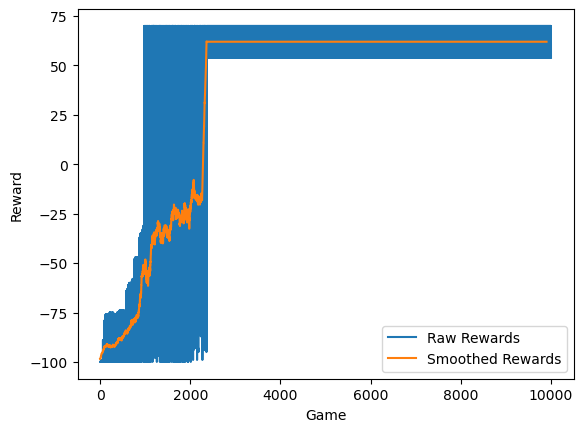

In [28]:
import matplotlib.pyplot as plt

smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards, label='Raw Rewards')
plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [34]:
qltetris.restart()
agent = QLAgent(qltetris, games=1, epsilon=0, alpha=0.2, gamma=1)
agent.Q_table = np.loadtxt("Q_table.txt")
observe_tetris_with_gui(qltetris, agent)

/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


game 0/1 reward nan


In [35]:
# Note how only few lines are non-zero.

Q_table = agent.Q_table
non_zero_rows_mask = np.any(Q_table != 0, axis=1)
num_non_zero_rows = np.sum(non_zero_rows_mask)
print(f"Non-zero rows = {num_non_zero_rows}")

Non-zero rows = 461


In [39]:
Q_table.size

4194304

### Try also with epsilon = 0.001 and games = 100_000

In [40]:
# Try also with epsilon = 0.001 and games = 100_000

qltetris.restart()
agent = QLAgent(qltetris, games=100_000, epsilon=0.001, alpha=0.2, gamma=1)

while agent.next_turn():
    pass

/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


game 0/100000 reward nan
game 100/100000 reward -98.51
game 200/100000 reward -92.78
game 300/100000 reward -92.57
game 400/100000 reward -91.84
game 500/100000 reward -88.73
game 600/100000 reward -88.21
game 700/100000 reward -85.47
game 800/100000 reward -79.27
game 900/100000 reward -80.99
game 1000/100000 reward -71.93
game 1100/100000 reward -53.43
game 1200/100000 reward -48.7
game 1300/100000 reward -39.09
game 1400/100000 reward -30.19
game 1500/100000 reward -37.05
game 1600/100000 reward -33.24
game 1700/100000 reward -38.06
game 1800/100000 reward -16.33
game 1900/100000 reward -17.23
game 2000/100000 reward -15.1
game 2100/100000 reward 71.4
game 2200/100000 reward 86.0
game 2300/100000 reward 78.36
game 2400/100000 reward 84.69
game 2500/100000 reward 86.0
game 2600/100000 reward 86.0
game 2700/100000 reward 84.48
game 2800/100000 reward 84.4
game 2900/100000 reward 69.5
game 3000/100000 reward 84.64
game 3100/100000 reward 76.91
game 3200/100000 reward 79.6
game 3300/100

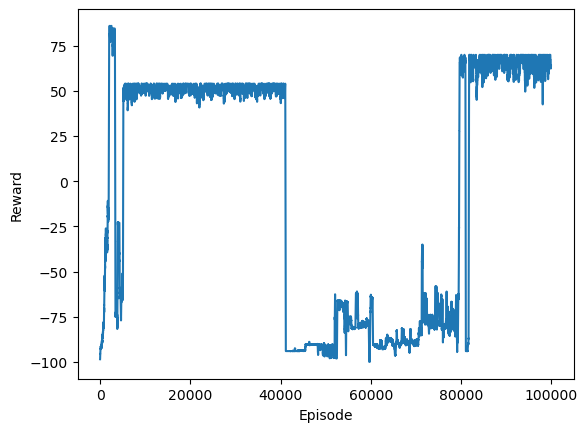

In [41]:
import matplotlib.pyplot as plt

smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards, label='Raw Rewards')
plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [42]:
qltetris.restart()
agent = QLAgent(qltetris, games=3, epsilon=0, alpha=0.2, gamma=1)
agent.Q_table = np.loadtxt("Q_table.txt")
observe_tetris_with_gui(qltetris, agent)

game 0/3 reward nan


In [43]:
# Interesting to note that the number of non-zero rows increases in this case.

Q_table = agent.Q_table
non_zero_rows_mask = np.any(Q_table != 0, axis=1)
num_non_zero_rows = np.sum(non_zero_rows_mask)
print(f"Non-zero rows = {num_non_zero_rows}")

Non-zero rows = 714


## Q-Learning with a Random Tile Sequence

In [44]:
qltetris = QLTetris(rows=4, cols=4, max_tiles=50, random_seed=None)
agent = QLAgent(qltetris, games=1_000_000, epsilon=0.001, alpha=0.2, gamma=1)

while agent.next_turn():
    pass

game 0/1000000 reward nan
game 100/1000000 reward -99.88
game 200/1000000 reward -99.67
game 300/1000000 reward -99.45
game 400/1000000 reward -99.1
game 500/1000000 reward -99.37
game 600/1000000 reward -98.66
game 700/1000000 reward -98.94
game 800/1000000 reward -98.87
game 900/1000000 reward -98.42
game 1000/1000000 reward -99.05
game 1100/1000000 reward -99.05
game 1200/1000000 reward -98.66
game 1300/1000000 reward -98.42
game 1400/1000000 reward -98.78
game 1500/1000000 reward -99.3
game 1600/1000000 reward -98.7
game 1700/1000000 reward -98.88
game 1800/1000000 reward -97.95
game 1900/1000000 reward -99.08
game 2000/1000000 reward -98.5
game 2100/1000000 reward -98.58
game 2200/1000000 reward -98.35
game 2300/1000000 reward -98.24
game 2400/1000000 reward -97.69
game 2500/1000000 reward -98.52
game 2600/1000000 reward -98.2
game 2700/1000000 reward -97.9
game 2800/1000000 reward -97.57
game 2900/1000000 reward -98.46
game 3000/1000000 reward -98.01
game 3100/1000000 reward -97.

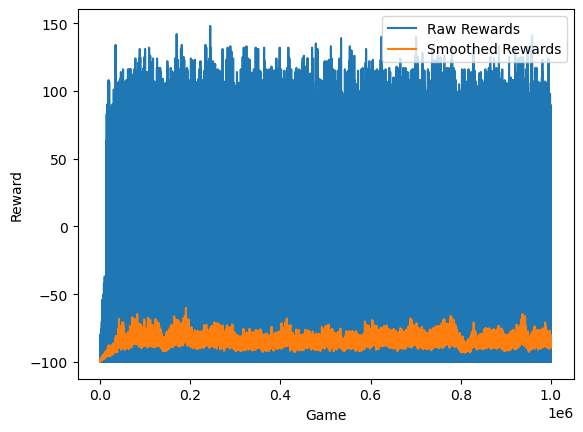

In [45]:
import matplotlib.pyplot as plt

smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards, label='Raw Rewards')
plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [46]:
qltetris.restart()
agent = QLAgent(qltetris, games=100, epsilon=0, alpha=0.2, gamma=1)
agent.Q_table = np.loadtxt("Q_table.txt")
observe_tetris_with_gui(qltetris, agent)

game 0/100 reward nan


In [48]:
# Interesting to note that the number of non-zero rows increases in this case.

Q_table = agent.Q_table
non_zero_rows_mask = np.any(Q_table != 0, axis=1)
num_non_zero_rows = np.sum(non_zero_rows_mask)
print(f"Non-zero rows = {num_non_zero_rows}")

Non-zero rows = 63263


## Deep Q-Learning

In [6]:
import deeplay as dl
import torch

class DQLAgent(dl.Application):
    """Deep-Q-learning agent to play Tetris.""" ### HERE
    
    def __init__(self, tetris, games, ### FROM HERE 
                 epsilon_max, epsilon_min, epsilon_scale, alpha, gamma, 
                 hidden_units, 
                 replay_buffer_size, batch_size, sync_target_game_count,
                 **kwargs): ### TO HERE
        """Initialize the agent."""
        
        self.tetris = tetris

        self.games = games
        self.game = 0

        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles
        )
        self.state_num = 2 ** self.state_size

        ### FROM HERE
        self.epsilon_max = epsilon_max 
        self.epsilon_min = epsilon_min  # Probability to choose a random action in the epsilon-greedy policy.
        self.epsilon_scale = epsilon_scale  # Decay scale of the game number where epsilon changes from unity to epsilon.
        self.epsilon = self.epsilon_max
        ### TO HERE

        self.alpha = alpha  # Alpha is the learning rate.
        self.gamma = gamma  # Discount factor.
        self.rewards = np.zeros(games)
        self.max_reward = 0 ### HERE

        ### FROM HERE
        self.buffer = []
        self.replay_buffer_size = replay_buffer_size  # Size of the experience replay buffer.
        self.batch_size = batch_size  # Number of samples taken from the experience replay buffer for each update.
        self.sync_target_game_count = sync_target_game_count  # Number of episodes between synchronizations of the target network.        

        self.q_net = self.get_net(hidden_units)
        self.target_net = self.get_net(hidden_units)

        super().__init__(
            loss=torch.nn.MSELoss(),
            optimizer=torch.optim.Adam(self.q_net.parameters(), lr=0.001),  ### Is it strictly needed to have self.q_net.parameters() as argument?
            **kwargs, 
        )
        ### TO HERE

        self.update_state()
    
    ### FROM HERE
    def get_net(self, hidden_units):
        """Create instance of neural network."""
        
        net = dl.MultiLayerPerceptron(
            in_features=self.state_size,
            hidden_features=hidden_units,
            out_features=self.action_num,
        )
        net.blocks[:-1].activation = torch.nn.ReLU()  # GELU stabilizes training, ReLU works ok as well.
        return net.build()
    ### TO HERE
    
    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        ### FROM HERE
        tile = bin(self.tetris.current_tile)[2:].zfill(2) ### instead of 2 use proper variable for the digits for tiles
        tile = np.array([int(i) for i in tile])
        ### TO HERE
    
        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = torch.tensor(self.state_binary, dtype=torch.float32) ### HERE

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            self.rewards[self.game] = self.tetris.reward
            if self.game % 100 == 0:
                av_reward = np.mean(self.rewards[self.game - 100:self.game])
                print(f"game {self.game}/{self.games} reward {av_reward}")
                ### FROM HERE
                if av_reward > self.max_reward:
                    self.max_reward = av_reward
                    torch.save(self.q_net.state_dict(), 'q_net.pth')
                ### TO HERE
            
            self.epsilon = max(self.epsilon_min, ### HERE
                               self.epsilon_max - self.game / self.epsilon_scale)
            if self.game < self.games:
                self.game += 1
                ### FROM HERE
                if ((len(self.buffer) >= self.replay_buffer_size)
                    and (self.game % self.sync_target_game_count == 0)):
                    self.target_net.load_state_dict(self.q_net.state_dict())
                ### TO HERE

                self.tetris.restart()
            else:
                ### NOTE MISSING LINE
                return False  # Finish.
        else:
            old_state = self.state
            
            # Select action.
            with torch.no_grad(): ### HERE
                if np.random.rand() < self.epsilon:
                    action = np.random.randint(self.action_num)
                else:
                    ### FROM HERE
                    state = self.state.view(1, self.state_size)
                    output = self.q_net(state).detach().numpy()[0]
                    action = np.argmax(output)
                    ### TO HERE
            
                # Extract rotation and movement from action parameter.
                new_x = action // self.position_num
                new_orientation = action % self.orientation_num
                
                # Execute action and drop tile.
                self.tetris.teleport(new_x, new_orientation) ### NOTE MISSING IF
                reward = self.tetris.drop()
                    
                # Update the state.
                self.update_state()
                new_state = self.state
                
                ### FROM HERE
                # Append to buffer and train network.
                self.buffer.append({
                    "old_state":old_state,
                    "action":action,
                    "reward":reward,
                    "new_state":new_state,
                    "gameover":self.tetris.gameover,
                })
                if len(self.buffer) >= self.replay_buffer_size + 1:
                    self.buffer.pop(0)
            if len(self.buffer) >= self.replay_buffer_size:
                # Training step.
                batch = random.sample(self.buffer, self.batch_size)

                # Store states in a list
                states = []
                next_states = []
                for sample in batch:
                    states.append(sample["old_state"])
                    next_states.append(sample["new_state"])
                # Initialize targets and target mask
                targets = torch.zeros(self.batch_size, self.action_num)
                targets_mask = torch.zeros(self.batch_size, self.action_num)
                # Evaluate next state with target network
                with torch.no_grad():
                    q_hat = self.target_net(torch.stack(next_states, dim=0))
                # Computes targets
                for idx, sample in enumerate(batch):
                    if sample["gameover"]:
                        y = sample["reward"]
                    else:
                        y = sample["reward"] + np.nanmax(q_hat[idx, :])
                    targets[idx, sample["action"]] = y
                    targets_mask[idx, sample["action"]] = 1
                # Evaluate old states, apply mask and update weights
                self.optimizer.zero_grad()
                outputs = self.q_net(torch.stack(states, dim=0)) * targets_mask
                loss = self.loss(outputs, targets)
                loss.backward()
                self.optimizer.step()
            ### TO HERE
        
        return True  # Continue.    


In [7]:
qltetris = QLTetris(rows=4, cols=4, max_tiles=50, random_seed=None)
agent = DQLAgent(qltetris, games=10_000, 
                 epsilon_max=1, epsilon_min=0.001, epsilon_scale=5000,
                 alpha=0.001, gamma=1,  
                 hidden_units=[128, 128],
                 replay_buffer_size=10000, batch_size=64, 
                 sync_target_game_count=100)

print(agent.q_net)
print(agent.target_net)

MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LayerActivationNormalization(
      (layer): Linear(in_features=18, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (1): LayerActivationNormalization(
      (layer): Linear(in_features=128, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (2): LayerActivationNormalization(
      (layer): Linear(in_features=128, out_features=16, bias=True)
      (activation): Identity()
      (normalization): Identity()
    )
  )
)
MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LayerActivationNormalization(
      (layer): Linear(in_features=18, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (1): LayerActivationNormalization(
      (layer): Linear(in_features=128, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (2): LayerActivationNormaliza

In [8]:
while agent.next_turn():
    pass

game 0/10000 reward nan
game 100/10000 reward -99.7
game 200/10000 reward -99.9


/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


game 300/10000 reward -99.9
game 400/10000 reward -99.73
game 500/10000 reward -99.68
game 600/10000 reward -99.7
game 700/10000 reward -99.56
game 800/10000 reward -99.77
game 900/10000 reward -99.87
game 1000/10000 reward -99.63
game 1100/10000 reward -99.77
game 1200/10000 reward -99.84
game 1300/10000 reward -99.76
game 1400/10000 reward -99.79
game 1500/10000 reward -99.86
game 1600/10000 reward -99.95
game 1700/10000 reward -99.69
game 1800/10000 reward -99.87
game 1900/10000 reward -99.93
game 2000/10000 reward -99.93
game 2100/10000 reward -99.75
game 2200/10000 reward -99.63
game 2300/10000 reward -99.92
game 2400/10000 reward -99.8
game 2500/10000 reward -99.9
game 2600/10000 reward -99.97
game 2700/10000 reward -99.97
game 2800/10000 reward -99.95
game 2900/10000 reward -99.23
game 3000/10000 reward -98.33
game 3100/10000 reward -98.5
game 3200/10000 reward -97.48
game 3300/10000 reward -98.08
game 3400/10000 reward -97.55
game 3500/10000 reward -97.12
game 3600/10000 reward

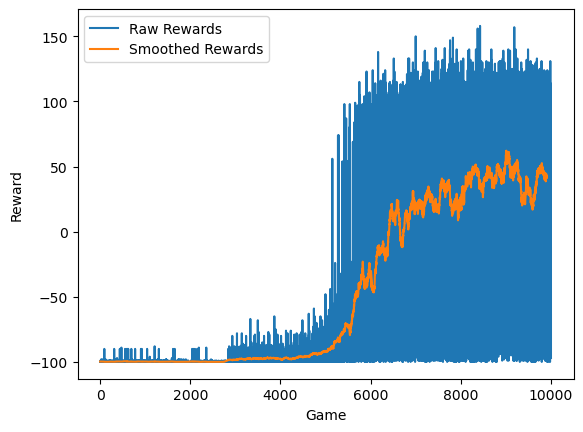

In [9]:
import matplotlib.pyplot as plt

smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards, label='Raw Rewards')
plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [11]:
qltetris.restart()
agent = DQLAgent(qltetris, games=10_000, 
                 epsilon_max=0, epsilon_min=0, epsilon_scale=5000, 
                 alpha=0.001, gamma=1,
                 hidden_units=[128, 128],
                 replay_buffer_size=10000, batch_size=64, 
                 sync_target_game_count=100)
model_state_dict = torch.load("q_net.pth")
agent.q_net.load_state_dict(model_state_dict)
agent.target_net.load_state_dict(model_state_dict)
observe_tetris_with_gui(qltetris, agent)

/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


game 0/10000 reward nan
